In [1]:
# Data manipulation imports
import pandas as pd
import numpy as np
import struct
import matplotlib.pyplot as plt

# Machine learning imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
def read_mnist_images(file_path):
    print("Opening file:", file_path)  # Print the file path before opening
    with open(file_path, 'rb') as file:
        magic, num, rows, cols = struct.unpack(">IIII", file.read(16))
        images = np.fromfile(file, dtype=np.uint8).reshape(num, rows, cols)
    return images

def read_mnist_labels(file_path):
    print("Opening file:", file_path)  # Print the file path before opening
    with open(file_path, 'rb') as file:
        magic_number, num_labels = struct.unpack(">II", file.read(8))
        labels = np.fromfile(file, dtype=np.uint8)
    return labels

In [3]:
train_images = read_mnist_images(r'mnist_data\train-images.idx3-ubyte')
train_labels = read_mnist_labels(r'mnist_data\train-labels.idx1-ubyte')
test_images = read_mnist_images(r'mnist_data\t10k-images.idx3-ubyte')
test_labels = read_mnist_labels(r'mnist_data\t10k-labels.idx1-ubyte')

Opening file: mnist_data\train-images.idx3-ubyte
Opening file: mnist_data\train-labels.idx1-ubyte
Opening file: mnist_data\t10k-images.idx3-ubyte
Opening file: mnist_data\t10k-labels.idx1-ubyte


In [4]:
# Converting the data type to 'float32' ensures that the pixel values of the images are represented as floating-point numbers.
# Normalizes the pixel values of the images. Dividing by 255 scales these values to the range [0, 1]. 
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [5]:
def display_images(images, labels):
    # Set up a grid of plots
    fig, axes = plt.subplots(nrows=5, ncols=5)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray') # Display image in greayscale
            ax.set_title(f"Number: {labels[i]}") # Show the corresponding label as the title
            ax.set_xticks([]) # Remove xticks from the plot
            ax.set_yticks([]) # Remove yticks from the plot
        else:
            ax.axis('off') # Hide axes if there are no images to display
    
    plt.tight_layout() # Adjusts the spacing between subplots to prevent overlap
    plt.show()

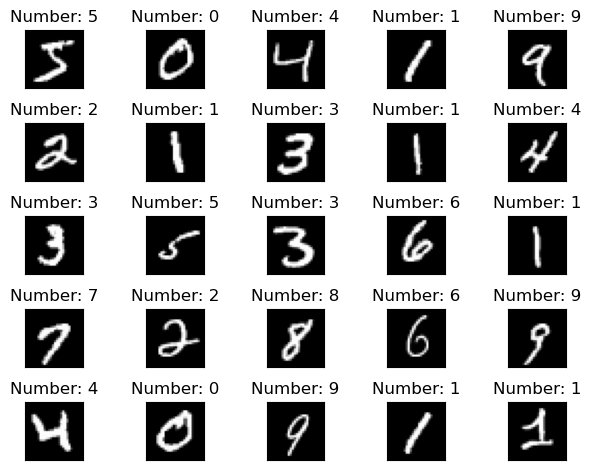

In [6]:
display_images(train_images, train_labels)

In [7]:
# Flatten the images into a 2D array keeping the original number of rows and auto detecting the number of columns
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)
x_train = train_images_flatten
x_test = test_images_flatten

In [9]:
y_train = train_labels
y_test = test_labels

In [10]:
model = SVC()

In [11]:
model.fit(x_train, y_train)

SVC()

In [12]:
predictions = model.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9792


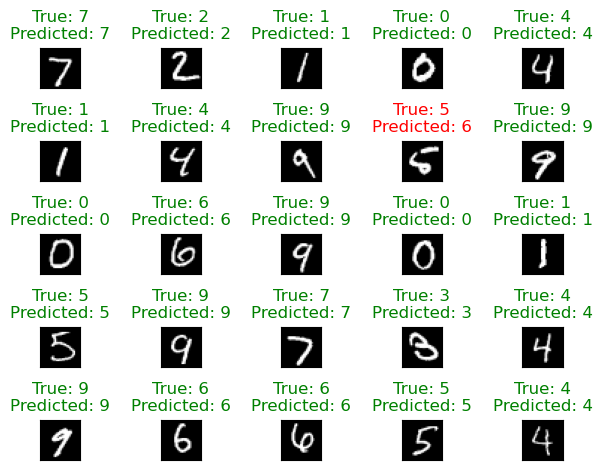

In [14]:
def display_images_with_predictions(images, true_labels, predicted_labels):
    # Set up a grid of plots
    fig, axes = plt.subplots(nrows=5, ncols=5)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='gray') # Display image in greayscale
            
            # Check if the prediction is correct
            if true_labels[i] == predicted_labels[i]:
                title_color = 'green'  # Correct predictions are shown in green
            else:
                title_color = 'red'    # Incorrect predictions are shown in red
                
            ax.set_title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}", color=title_color) # Show true and predicted label as the title
            ax.set_xticks([]) # Remove xticks from the plot
            ax.set_yticks([]) # Remove yticks from the plot
        else:
            ax.axis('off') # Hide axes if there are no images to display
    
    plt.tight_layout() # Adjusts the spacing between subplots to prevent overlap
    plt.show()

# Assuming you have predictions as 'predictions'
display_images_with_predictions(test_images, test_labels, predictions)